

# Project: Investigate a Dataset - TMDB Movie ratings

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset selected for analysis is "TMDB Movies". To get an idea on what questions can be asked, the dataset is loaded, and a basic summary of the dataset is obtained

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
% matplotlib inline

Importing and loading up data to get an idea on what questions can be answered from the Dataset

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

## Questions that can be answered

Based on the above cell's results, the following questions are chosen for analysis.

1. Does runtime has an effect on popularity, revenue of the movies ?

2. What is the typical runtime of movies over the years.?

3. Is budget correlated with increase in revenue ?

4. Popularity vs Revenue

5. Who are the top '5' directors w.r.t max(revenue) .? Does their movies always have a higher revenue return than others..?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

As seen from the head() and info() function, cell 2, and cell 3, the following columns has null values

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Since, Homepage is not needed, dropping that column
Tagline, overview also won't be useful for answering any of the thought up question. Hence removing them too
Keywords is similar to genre and can be dropped.
Production companies or not needed either.

In [10]:
df.drop(columns=['homepage','tagline', 'overview', 'keywords', 'production_companies'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 16 columns):
id                10856 non-null int64
imdb_id           10856 non-null object
popularity        10856 non-null float64
budget            10856 non-null int64
revenue           10856 non-null int64
original_title    10856 non-null object
cast              10780 non-null object
director          10816 non-null object
runtime           10856 non-null int64
genres            10835 non-null object
release_date      10856 non-null object
vote_count        10856 non-null int64
vote_average      10856 non-null float64
release_year      10856 non-null int64
budget_adj        10856 non-null float64
revenue_adj       10856 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


Other columns has few Nulls and are dropped

In [11]:
df.dropna(how='any', axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10727 entries, 0 to 10865
Data columns (total 16 columns):
id                10727 non-null int64
imdb_id           10727 non-null object
popularity        10727 non-null float64
budget            10727 non-null int64
revenue           10727 non-null int64
original_title    10727 non-null object
cast              10727 non-null object
director          10727 non-null object
runtime           10727 non-null int64
genres            10727 non-null object
release_date      10727 non-null object
vote_count        10727 non-null int64
vote_average      10727 non-null float64
release_year      10727 non-null int64
budget_adj        10727 non-null float64
revenue_adj       10727 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


### Converting to correct data types

Converting release_date column to datetime object

In [44]:
df['release_date'] = pd.to_datetime(df['release_date'])

## Saving cleaned file

Saving the files with no nulls and only necessary columns as 'movies_clean.csv'

In [45]:
df.to_csv('movies_clean.csv', index=False)

In [2]:
# Loading cleaned file

df = pd.read_csv('movies_clean.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Does runtime has an effect on popularity, revenue (normalized) of the movies ?

Does runtime has an effect on popularity, revenue (normalized) of the movies ?
What is the typical runtime of movies over the years.?
Popularity vs Revenue (normalized)
Has newer movies generally fetched higher revenues regardless of other factors.?*
Who are the top '5' directors w.r.t max(revenue) .? Does their movies always have a higher revenue return than others..?
Does popularity directly relate with the presence of specific genre..?
Does revenue directly relate with the presence of specific genre..?

In [17]:
import seaborn as sns

In [20]:
df.popularity.describe()

count    10727.000000
mean         0.652774
std          1.004948
min          0.000188
25%          0.210766
50%          0.387190
75%          0.721488
max         32.985763
Name: popularity, dtype: float64

In [21]:
df.runtime.describe()

count    10727.000000
mean       102.492682
std         30.472103
min          0.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

Text(0,0.5,'Popularity')

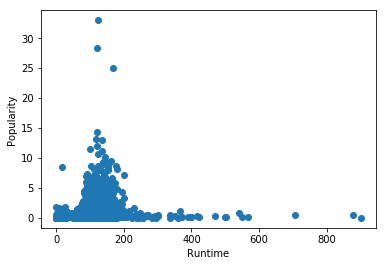

In [48]:
plt.scatter(x=df.runtime, y=df.popularity)
plt.xlabel('Runtime')
plt.ylabel('Popularity')

#### Answer :

Although, not much is found from the plot, it can be seen that movies with higher ratings generally have runtime between 90 to 180 mins (approx)

### Runtime vs Revenue

Revenue isn't normalized as many of the data has zero in place of revenue.

Text(0,0.5,'Revenue')

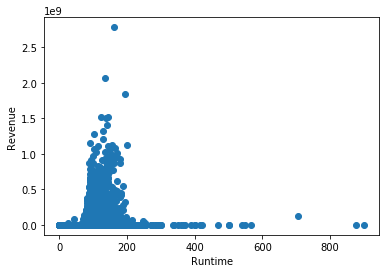

In [49]:
plt.scatter(x=df.runtime, y=df.revenue)
plt.xlabel('Runtime')
plt.ylabel('Revenue')

Runtime vs Revenue has given a similar result as with popularity

### Research Question 2  What is the typical runtime of movies over the years..?

Text(0,0.5,'Runtime')

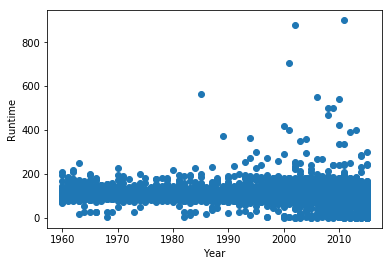

In [62]:
plt.scatter(y=df.runtime, x=df.release_year)
plt.xlabel('Year')
plt.ylabel('Runtime')

In [57]:
runtime_df = df.groupby('release_year')['runtime'].mean()

Text(0.5,1,'Mean Runtime over the years')

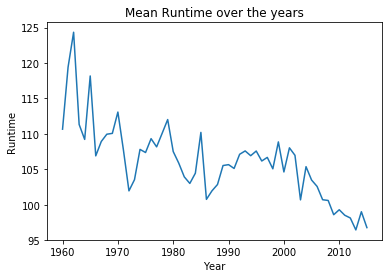

In [61]:
plt.plot(runtime_df)
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.title('Mean Runtime over the years')

### Result

Over the years, the runtime of the movies hasn't changed much. But after 2000, number of movies with runtime less than 60 mins, has increased which can be seen from the scatter plot.

Also, the line plot shows how the Mean runtime has changed over the years.

## Research Question 3: Has the number of movies released per year increased with time.?

Text(0.5,1,'Number of movies released each year')

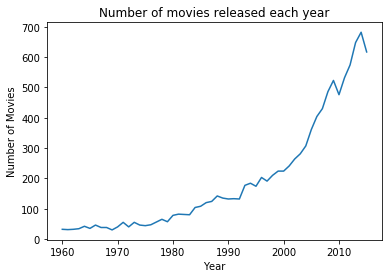

In [88]:
yr_f = df.groupby('release_year')['release_year'].count()
plt.plot(yr_f)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of movies released each year')

### Result

The Number of movies released per year, has exploded over the years. Starting from 30 years per year, it has reached a peak of 700 movies per year

### Question 3 : Who are the top '5' directors w.r.t max(revenue) ? Does their movies always have a higher revenue return than others..?

First, to find the top 5 directors, the DataFrame is grouped by directors, and the result is sorted based on revenue column.

Second part of this question isn't answered, as there are only 29 movies from these directors, and there are so many zeros with other movies, which messes up their mean values

In [43]:
sorted_df = df.sort_values('revenue_adj', ascending=False)
sorted_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1355,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
1299,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
5141,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
10457,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09
9673,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09


In [45]:
directors = sorted_df['director'].head()
directors

1355        James Cameron
1299         George Lucas
5141        James Cameron
10457    William Friedkin
9673     Steven Spielberg
Name: director, dtype: object

### Question 5 : Popularity vs Revenue

Text(0.5,1,'Popularity vs Revenue')

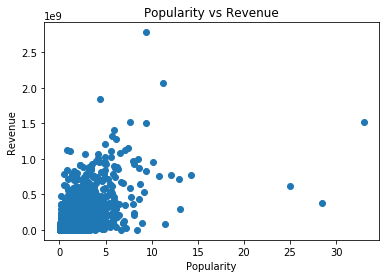

In [37]:
plt.scatter(x=df.popularity, y=df.revenue)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs Revenue')

#### Result :

The variables Popularity and Revenue seems to be lightly correlated to each other.

#### Distribution of movie runtime

Text(0.5,1,'Distribution of runtime of movies')

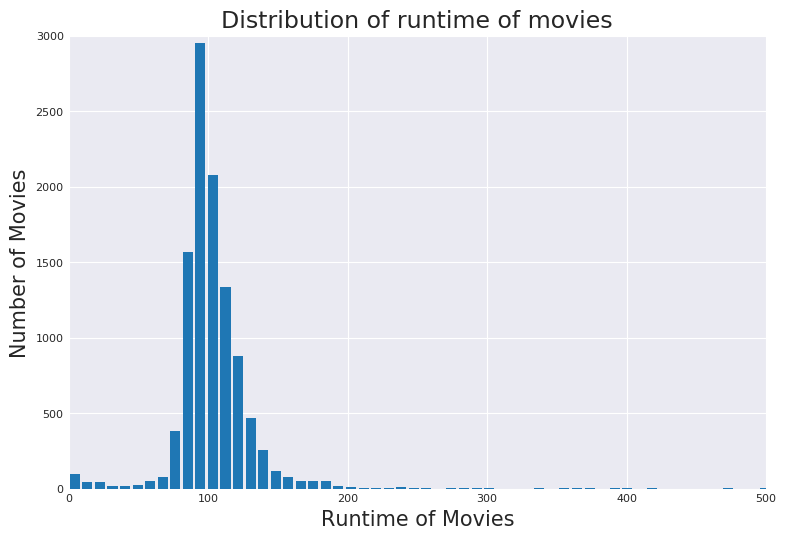

In [29]:
#Changes plot size for all the subsequent plots
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

plt.figure(figsize=(9,6), dpi=100)
plt.hist(df.runtime, rwidth=0.8, bins=100)
plt.xlabel('Runtime of Movies', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.axis([0,500,0, 3000])
plt.title('Distribution of runtime of movies', fontsize=17)

From the above histogram, it can be seen that  most movies have a runtime of around 80-120 mins with 100 mins having the highest number of movies. Also, it can be seen that mean is right side of the mode, thus the distrubtion is right skewed.

In [52]:
df.runtime.describe()

count    10727.000000
mean       102.492682
std         30.472103
min          0.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

From the above series, it can be seen that, average runtime is around 102 mins. Only 25 percent of the movies have less than '90 mins' runtime. And Almost 50 percent of the movies have a runtime between '90 mins and 120 mins', just as seen from the histogram. A box plot can also be used to find out the outliers if necessary

## Data Cleaning Part 2

Since, the below section takes into consideration of Profit as factor for analysis, removing all entries with zeros removed

In [36]:
no_zeros = df[df.revenue != 0]
no_zeros = no_zeros[no_zeros.budget != 0]
no_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10709
Data columns (total 16 columns):
id                3850 non-null int64
imdb_id           3850 non-null object
popularity        3850 non-null float64
budget            3850 non-null int64
revenue           3850 non-null int64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
release_date      3850 non-null object
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 511.3+ KB


In [37]:
# Removing unnecessary columns - Vote Count, imdb_id, Vote Average

no_zeros.drop(columns=['vote_count', 'vote_average', 'imdb_id'], inplace=True)

In [38]:
no_zeros.duplicated().sum()

1

In [41]:
# Deleting duplicate
no_zeros.drop_duplicates(inplace=True)
no_zeros.duplicated().sum()

0

In [42]:
#Creating Profit Column

no_zeros['profit'] = no_zeros['revenue'] - no_zeros['budget']
no_zeros['profit_adj'] = no_zeros['revenue_adj'] - no_zeros['budget_adj']

In [44]:
# Saving cleaned data to a new csv
no_zeros.to_csv('no_zeros.csv', index=False)

In [55]:
# Setting style for Graphs

sns.set_style('darkgrid')

### General Questions
General questions about the dataset.
1. Which movie earns the most and least profit?
2. Which movie had the greatest and least runtime?
3. Which movie had the greatest and least budget?
4. Which movie had the greatest and least revenue?
5. What is the average runtime of all movies?
6. What are the similar characteristics does the most profitable movie have?
7. Average duration of movies.
8. Average Budget.
9. Average revenue.
10. Average profits.

In [45]:
# Loading cleaned dataset

df_cleaned = pd.read_csv('no_zeros.csv')

In [48]:
df_cleaned.iloc[df_cleaned.revenue_adj.idxmax()]

id                                                            19995
popularity                                                  9.43277
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                             2009-12-10
release_year                                                   2009
budget_adj                                              2.40887e+08
revenue_adj                                             2.82712e+09
profit                                                   2544505847
profit_adj                                      

In [49]:
df_cleaned.iloc[df_cleaned.revenue_adj.idxmin()]

id                                                            13537
popularity                                                 0.462609
budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                  Billy Ray
runtime                                                          94
genres                                                Drama|History
release_date                                             2003-11-14
release_year                                                   2003
budget_adj                                              7.11212e+06
revenue_adj                                                 2.37071
profit                                                     -5999998
profit_adj                                      

In [53]:
df_cleaned.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj,profit,profit_adj
count,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3.849000e+03,3.849000e+03
mean,39885.146791,1.192933,3.724886e+07,1.078148e+08,109.217459,2001.258249,4.429360e+07,1.372313e+08,7.056595e+07,9.293772e+07
std,67248.890597,1.475622,4.221699e+07,1.766175e+08,19.914141,11.285642,4.481360e+07,2.162018e+08,1.506990e+08,1.941716e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08,-4.139124e+08
25%,6072.000000,0.463337,1.000000e+07,1.367069e+07,95.000000,1995.000000,1.316623e+07,1.843023e+07,-1.312284e+06,-1.503317e+06
50%,11313.000000,0.798582,2.400000e+07,4.490726e+07,106.000000,2004.000000,3.005030e+07,6.181393e+07,2.014450e+07,2.745198e+07
75%,38575.000000,1.374300,5.000000e+07,1.243052e+08,119.000000,2010.000000,6.076720e+07,1.634115e+08,8.198066e+07,1.075480e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.750137e+09


Basic statistics about the movies such as, Max, Min and Mean of each features can be easily calculated from describe function. It can be seen that,

**For Budget**,

Max Budget = 42.5 Billion.

Min Budget = 1 USD (Seems fishy here). Let's look at that later

**For Revenue**

Max Revenue = 278.1 Billion.

Min Revenue = 2 USD (!!!)

**For Profit**

Max Profit = 254.4 Billion

Min Profit = -41.3 Billion (Loss. Unexpected)

Let's explore all of them a little further.

In [54]:
df_cleaned.iloc[df_cleaned.revenue.idxmin()]

id                                                            13537
popularity                                                 0.462609
budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                  Billy Ray
runtime                                                          94
genres                                                Drama|History
release_date                                             2003-11-14
release_year                                                   2003
budget_adj                                              7.11212e+06
revenue_adj                                                 2.37071
profit                                                     -5999998
profit_adj                                      

Looks like this an error in data. The original IMDB result shows 2.2 Million

In [55]:
df_cleaned.iloc[df_cleaned.profit.idxmin()]

id                                                            46528
popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                             2010-12-02
release_year                                                   2010
budget_adj                                                 4.25e+08
revenue_adj                                             1.10876e+07
profit                                                   -413912431
profit_adj                                      

This seems to be correct. So, this movie has recorded the highest loss in history

### Advanced Questions
1. Which director directed most films?
2. Whcih cast has appeared the most?
3. Which genre were more successful?
4. Which month released highest number of movies in all of the years? And which month made the most profit?

In [58]:
def split_count(df, column):

# Joining all data from cast column into a single string
# Having no separator, means each line is concatenated with next without splitting. And if a column has a
# single director then it will keep adding them, and wont separate them with '|' until there is a movie with
# mutilple directors separated by '|'

    data = df[column].str.cat(sep = '|')

    # Converting that string to a Pandas Series
    data = pd.Series(data.split('|'))
    
    # count how many times each entry has occurred
    count = data.value_counts()
    
    return count

### Which director has directed the most number of films. 
For the following questions, Let us consider movies with profits greater than 50M USD

In [62]:
df_50 = df_cleaned[df_cleaned.profit >= 50000000]

In [63]:
# Getting the count of directors

count = split_count(df_50.copy(), 'director')
count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Ron Howard          10
dtype: int64

As expected, **Steven Spielberg** has the most number of movies with profits greater than 50M USD. That's really a great feat. Although from this  we can have a fair assumption that, movies directed by these top directors will fetch higher profits, I don't think that can be supported without having a data set with all the movies directed by these directors and their respective profits.

### Who has appeared the most in films above 50M USD profits.?

This will give an idea on whose movies give higher returns.

In [64]:
count = split_count(df_50.copy(), 'cast')
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

So, it's **Tom Cruise**, with 27 films grossing over $50 M. I did expected this, after all I know only few hollywood actors to begin with (!! ;D). Pretty much all of these actors are well known and as expected their huge fanbase is quite enough to make a film gross over 50M USD. **Brad Pitt** is quite close in the list with 25 movies.

### What type of genre are more popular.?

In [88]:
count = split_count(df_50.copy(), 'genres')
count.sort_values(ascending=True, inplace=True)

Text(0.5,0,'Number of Movies')

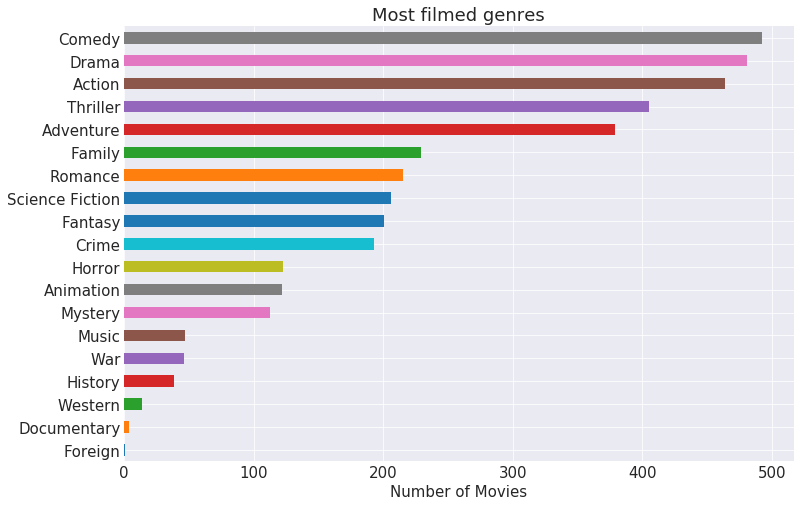

In [91]:
# Plot a bar chart for easier understanding
bar_plot = count.plot.barh(fontsize=15)
bar_plot.figure.set_size_inches(12,8)
bar_plot.set_title('Most filmed genres', fontsize=18)
bar_plot.set_xlabel('Number of Movies', fontsize=15)

Unexpected. **Comedy** genre is even more popular than the Action and Thriller genre. But by no means they are less popular, infact, they closely follow the **comedy** genre with 480 and 410 movies. Documentary and Foreign genre seems to be the least popular. So, a movie with 'Comedy, Action, and Adventure' is likely to be more profitable than 'other' genre movies.

### Which month released highest number of movies in all of the years

In [116]:
# Let's first create a copy of the dataset
month_df = df_50.copy()

# Converting release date to datetime object. Since, it was converted back to string while storing as CSV
month_df['release_date'] = pd.to_datetime(month_df.release_date)

In [117]:
# set Release date as index
month_df.set_index(keys='release_date', inplace=True)

In [120]:
# Grouping by Month
group_month = month_df.groupby(month_df.index.month)

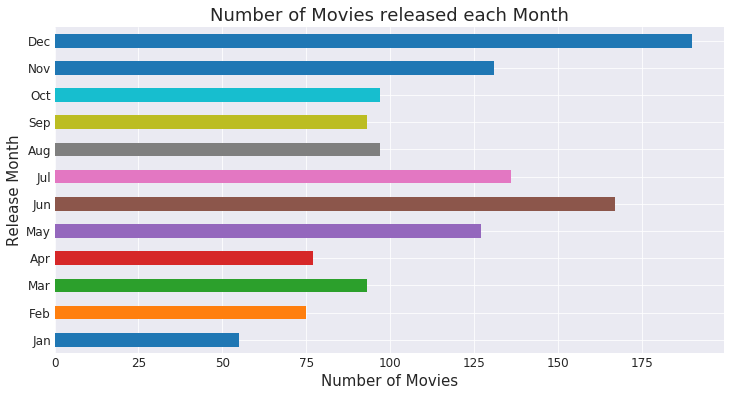

In [135]:
# Plotting No of movies each month

month_count = group_month['id'].count()
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bar_plot = month_count.plot.barh()
bar_plot.figure.set_size_inches(12,6)
bar_plot.set_title('Number of Movies released each Month', fontsize=18)
bar_plot.set_xlabel('Number of Movies', fontsize=15)
bar_plot.set_ylabel('Release Month', fontsize=15)
bar_plot.set_yticklabels(month_list, fontsize=12)
bar_plot.tick_params(labelsize=12)

December month sees the highest movie release in a year. Possibly due to presence of Winter holidays and festivals such as "Christmas" and 'New Year's Eve"

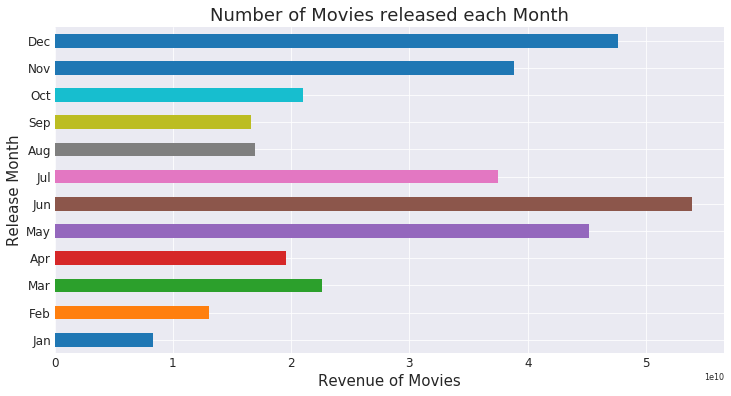

In [137]:
# Group by Month, and add the revenues in each monthb
month_count = group_month['revenue'].sum()
bar_plot = month_count.plot.barh()
bar_plot.figure.set_size_inches(12,6)
bar_plot.set_title('Number of Movies released each Month', fontsize=18)
bar_plot.set_xlabel('Revenue of Movies', fontsize=15)
bar_plot.set_ylabel('Release Month', fontsize=15)
bar_plot.set_yticklabels(month_list, fontsize=12)
bar_plot.tick_params(labelsize=12)

Although, December had the highest number of movie releases, still Jun has higher revenue, which means, 'June' is a better month to release than december. This can be due to the fact that 'December' has higher **competition**. Also, it seems like months of 'June', 'May', 'December', 'November' are the best time to release a movie.

<a id='conclusions'></a>
## Conclusions

After analyzing the TMDB movie dataset, I conclude that, for a movie to be successful,

Selecting the following things may be helpful

**Top 4 from Cast, Director, Release Month, Genre**

**Cast** : Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone

**Director** : Steven Spielberg, Robert Zemeckis, Clint Eastwood, Tim Burton

**Genre** : Comedy, Action, Thriller, Adventure

**Release Month** : June, December, May, November


### Limitations

The above conclusion doesn't mean that having any of those combination always gets us more than 50M USD in profits. It just gives an idea of whose presence, and direction has an impact on profits. Apart from these 4, there are so many external factors which will affect the profits of a movie, such as movies from the part of "The Avengers" series generally have higher profits. Considering that, even "The Avengers : Infinity Wars" was supposed to launched around 'May' (which later got pre-poned to April last, due to Mr.Robert Downey Jr's request) we can assume that, even the 'Avengers' team has done a similar analysis.

Also, due to not so strong correlation between variables, the general questions such as runtime vs revenue, and other such plots only give as a hint on which range of values generally have higher profits, rather than saying 'higher runtime always yields higher revenue'

### References

https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

https://github.com/JuzerShakir/Investigate_TMDb_Movies/blob/master/Investigating_Database.ipynb